# Entrenamiento fold 2

In [ ]:
import pandas as pd
from pandas import DataFrame
import numpy as np
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

Se optó por construir los folds previamente utilizando Weka utilzando un filtro que nos garantiza que estos fueron construidos con un proceso de muestreo samplificado

In [ ]:
# Abrimos los .csv del fold

# Fold 2
training_set_2 = pd.read_csv("./fold_2/training.csv")
test_set_2 = pd.read_csv("./fold_2/test.csv")

In [3]:
# Variables en común usadas en todos los entrenamientos

# Número de instancias por pliegue. Todos los folds tienen un número igual
# de instancias positivas y negativas.
attributes = training_set_2.columns[:-1]
class_attribute = training_set_2.columns[-1]
class_attribute_name = training_set_2[training_set_2.columns[-1]].drop_duplicates()

positive_count, negative_count = training_set_2.groupby([class_attribute])[class_attribute].count()


print(len(attributes))
print(class_attribute)
print(len(class_attribute_name))
print(positive_count)

8
class
2
533


## Entrenamiento con fold 1

### Exploración de número de neuronas

In [6]:
from sklearn.neural_network import MLPClassifier

last_expermient_no = 0 # Número del último experimento conducido
init_neurons = (len(attributes)+len(class_attribute_name)) // 2
hidden_layer_sizes = (init_neurons) # Número de neuronas/capas
epochs = 1
learning_rate = 0
momentum = 0


results = []

for neurons_count in range(init_neurons, (init_neurons*2) + 3, 1):
    print(f"================{neurons_count} neurons===================")
    hidden_layer_sizes = (neurons_count) 
    clasificador = MLPClassifier(solver='lbfgs', 
                    hidden_layer_sizes=hidden_layer_sizes,
                    random_state=98041)


    #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
    train_attribute_values = training_set_2[attributes]
    train_class_values = training_set_2[class_attribute]

    test_attribute_values = test_set_2[attributes]
    test_class_values = test_set_2[class_attribute]

    ################## Modelo ###########################
    model = clasificador.fit(train_attribute_values, train_class_values)
    ################## Clasificar  #################
    predict = model.predict(test_attribute_values)
    ############ Evaluar ###############################
    report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
    report = classification_report(test_class_values, predict, labels=class_attribute_name)
    # record training set accuracy and error
    training_accuracy = (clasificador.score(train_attribute_values, train_class_values))
    training_error = (1.0 - clasificador.score(train_attribute_values, train_class_values))
    # record generalization accuracy and error
    test_accuracy = (clasificador.score(test_attribute_values, test_class_values))
    test_error = (1.0 - clasificador.score(test_attribute_values, test_class_values))
    #print(report)
    print(f"acc={report_dict['accuracy']}")
    print(f"training_accuracy = {training_accuracy}")
    print(f"test_accuracy = {test_accuracy}")
    #last_expermient_no += 1
    #results.append([])


# Escribir los resultados a un .csv para llevar record de los expermientos
#experiments_fold_1 = pd.read_csv('experiments_fold_1.csv')
#for result in results:
#    experiments_fold_1.loc[len(experiments_fold_1)] = result
#experiments_fold_1.to_csv('experiments_fold_1.csv', index=False)


================5 neurons===================
acc=0.7279549718574109
training_accuracy = 0.7563261480787254
test_accuracy = 0.7279549718574109
================6 neurons===================
acc=0.525328330206379
training_accuracy = 0.5538894095595126
test_accuracy = 0.525328330206379
================7 neurons===================
acc=0.7110694183864915
training_accuracy = 0.739456419868791
test_accuracy = 0.7110694183864915
================8 neurons===================
acc=0.7204502814258912
training_accuracy = 0.7497656982193065
test_accuracy = 0.7204502814258912
================9 neurons===================
acc=0.7148217636022514
training_accuracy = 0.7282099343955014
test_accuracy = 0.7148217636022514
================10 neurons===================
acc=0.7448405253283302
training_accuracy = 0.7713214620431116
test_accuracy = 0.7448405253283302
================11 neurons===================
acc=0.724202626641651
training_accuracy = 0.7403936269915652
test_accuracy = 0.724202626641651
=========

Al hacer esta prueba, a diferencia del entrenamiento con el fold 1, la ventaje de la topología con 8 neuronas no era tan evidente, ya que la topología con 10 neuronas presenta un accuracy superior y la diferencia entre los accuracies podría entrar dentro de un rango aceptable, por lo que en el siguiente experimento también voy a probar topologías con 10 neuronas para ver si vale la pena el costo cómputo extra.

### Experimentación número de capas ocultas

In [8]:
last_expermient_no = 0 # Número del último experimento conducido
epochs = 1
learning_rate = 0
momentum = 0

results = []

hidden_layer_sizes = []

for n in (8, 10):
    hidden_layer_sizes = []
    for _ in range(1, 6, 1):
        hidden_layer_sizes.append(n)
        print(f"================layers = {hidden_layer_sizes}===================")
        clasificador = MLPClassifier(solver='lbfgs', 
                        hidden_layer_sizes=hidden_layer_sizes,
                        random_state=98041)


        #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
        train_attribute_values = training_set_2[attributes]
        train_class_values = training_set_2[class_attribute]

        test_attribute_values = test_set_2[attributes]
        test_class_values = test_set_2[class_attribute]

        ################## Modelo ###########################
        model = clasificador.fit(train_attribute_values, train_class_values)
        ################## Clasificar  #################
        predict = model.predict(test_attribute_values)
        ############ Evaluar ###############################
        report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
        report = classification_report(test_class_values, predict, labels=class_attribute_name)
        # record training set accuracy and error
        training_accuracy = (clasificador.score(train_attribute_values, train_class_values))
        training_error = (1.0 - clasificador.score(train_attribute_values, train_class_values))
        # record generalization accuracy and error
        test_accuracy = (clasificador.score(test_attribute_values, test_class_values))
        test_error = (1.0 - clasificador.score(test_attribute_values, test_class_values))
        #print(report)
        print(f"acc={report_dict['accuracy']}")
        print(f"training_accuracy = {training_accuracy}")
        print(f"test_accuracy = {test_accuracy}")


================layers = [8]===================
acc=0.7204502814258912
training_accuracy = 0.7497656982193065
test_accuracy = 0.7204502814258912
================layers = [8, 8]===================
acc=0.6472795497185742
training_accuracy = 0.6616682286785379
test_accuracy = 0.6472795497185742
================layers = [8, 8, 8]===================
acc=0.7129455909943715
training_accuracy = 0.7703842549203374
test_accuracy = 0.7129455909943715
================layers = [8, 8, 8, 8]===================
acc=0.726078799249531
training_accuracy = 0.7806935332708529
test_accuracy = 0.726078799249531
================layers = [8, 8, 8, 8, 8]===================
acc=0.7223264540337712
training_accuracy = 0.7619493908153702
test_accuracy = 0.7223264540337712
================layers = [10]===================
acc=0.7448405253283302
training_accuracy = 0.7713214620431116
test_accuracy = 0.7448405253283302
================layers = [10, 10]===================
acc=0.7129455909943715
training_accuracy = 0.770

No es claro aquí cuál es el número óptimo de capaz ocultas. Por un lado, con una sola capa de 10 neuronas se obtiene la mejor relación entre el acc sobre el test y sobre el training pero por el otro quizás una sola neurona no nos de tanta expresividad como topologías con más capas.

Para descartar dudas a través de experimentación, tomaré las mejores topologías con 8 y 10 neuronas y experimentaré con ellas.

### Experimentación número de épocas

################## layers = [8, 8, 8] ########################
---------------------- epochs = 10 -----------------------
acc=0.5159474671669794
---------------------- epochs = 15 -----------------------
acc=0.5309568480300187
---------------------- epochs = 20 -----------------------
acc=0.600375234521576
---------------------- epochs = 25 -----------------------
acc=0.6097560975609756
---------------------- epochs = 30 -----------------------
acc=0.6078799249530957
---------------------- epochs = 35 -----------------------
acc=0.6285178236397748
---------------------- epochs = 40 -----------------------
acc=0.6435272045028143
---------------------- epochs = 45 -----------------------
acc=0.649155722326454
---------------------- epochs = 50 -----------------------
acc=0.649155722326454
---------------------- epochs = 55 -----------------------
acc=0.651031894934334
---------------------- epochs = 60 -----------------------
acc=0.6679174484052532
---------------------- epochs = 65 ----

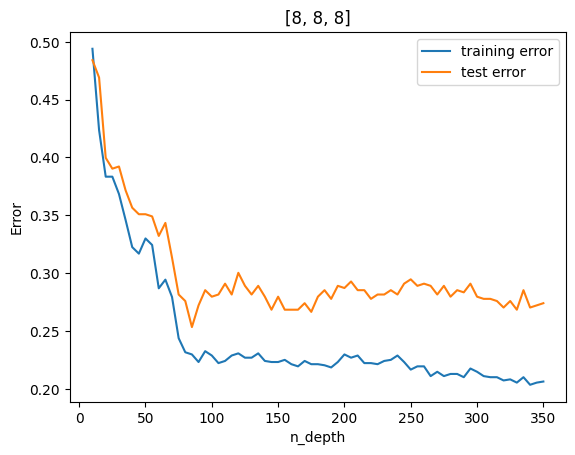

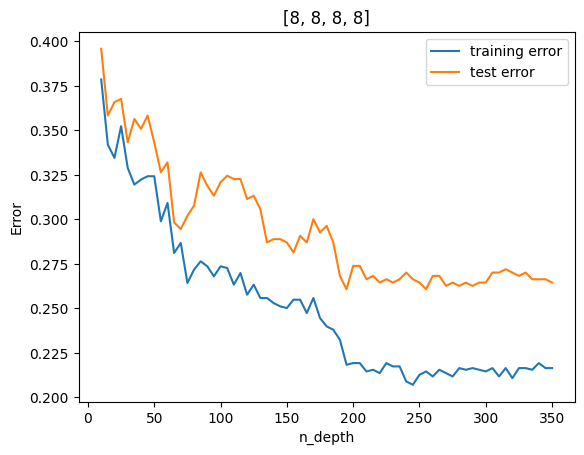

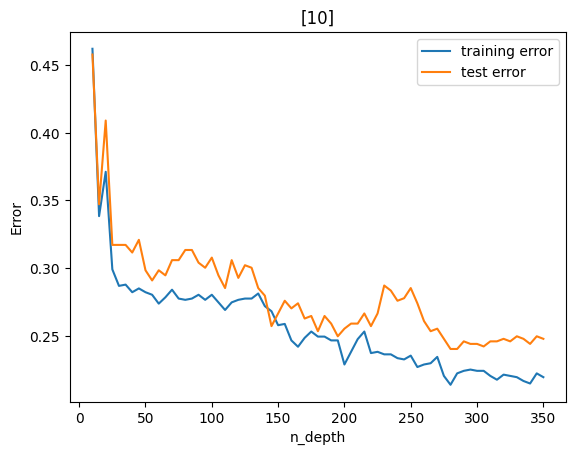

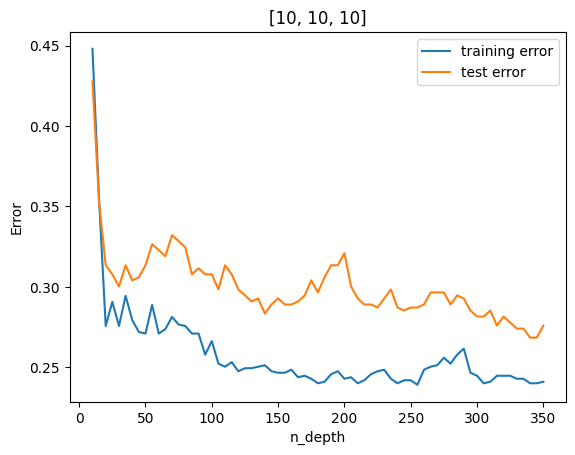

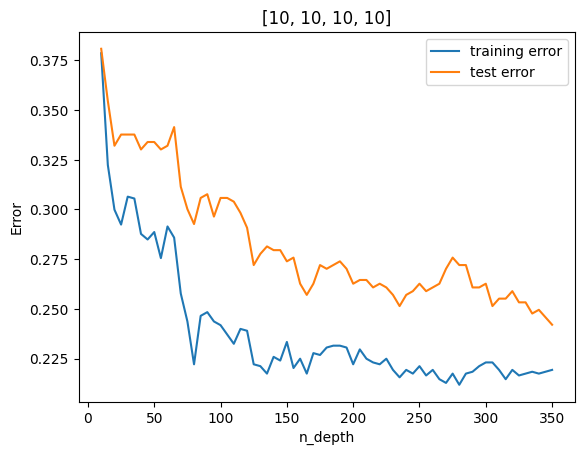

In [10]:
import matplotlib.pyplot as plt

last_expermient_no = 0 # Número del último experimento conducido
learning_rate = 0
momentum = 0

results = []

# se probaron estas topologías inicialmente: [8,8,8], [8,8,8,8], [10], [10, 10, 10], [10, 10, 10, 10]
topologies = [[8,8,8], [8,8,8,8], [10], [10, 10, 10], [10, 10, 10, 10]] 
epochs = range(10, 351, 5) # La granulaidad fue cambiando conforme la experimentación

for topology in topologies:
    print(f"################## layers = {topology} ########################")
    
    training_accuracy = []
    test_accuracy = []
    training_error = []
    test_error = []
    
    for epoch in epochs:
        print(f"---------------------- epochs = {epoch} -----------------------")
        best_acc = -1
        clasificador = MLPClassifier(solver='lbfgs', 
                        hidden_layer_sizes=topology,
                        max_iter = epoch,
                        random_state=98041)


        #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
        train_attribute_values = training_set_2[attributes]
        train_class_values = training_set_2[class_attribute]

        test_attribute_values = test_set_2[attributes]
        test_class_values = test_set_2[class_attribute]

        ################## Modelo ###########################
        model = clasificador.fit(train_attribute_values, train_class_values)
        ################## Clasificar  #################
        predict = model.predict(test_attribute_values)
        ############ Evaluar ###############################
        report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
        report = classification_report(test_class_values, predict, labels=class_attribute_name)

        training_accuracy.append(clasificador.score(train_attribute_values, train_class_values))
        training_error.append(1.0 - clasificador.score(train_attribute_values, train_class_values))

        if training_accuracy[-1] > best_acc:
            print(f"New best acc: {training_accuracy[-1]} with {epoch} epochs")
            best_acc = training_accuracy[-1]

        test_accuracy.append(clasificador.score(test_attribute_values, test_class_values))
        test_error.append(1.0 - clasificador.score(test_attribute_values, test_class_values))
        print(f"acc={report_dict['accuracy']}")

    plt.figure()
    plt.title(str(topology))
    plt.plot(epochs, training_error, label="training error")
    plt.plot(epochs, test_error, label="test error")
    plt.ylabel("Error")
    plt.xlabel("n_depth")
    plt.legend()


A partir de esta serie de experimentos y graficas, llego a este análisis:
1. La topología [8, 8, 8] presenta un buen balance lo compacta que es y su accuracy, que en el mejor punto antes del overfitting es de ~0.7467
2. La topología [8, 8, 8, 8] presenta un peor mejor accuracy que la topología anterior incluso cuando tomó más épocas llegar al punto de overfitting (al rededor de epochs = 195)
3. La topología [10] presenta un buen accuracy, pero sigue siendo inferior al de [8,8,8] y le toma más épocas llegar a él. Además, el hecho de tener una sola capa afecta mucho la expresividad de la red vs tener más de una.
4. Las topologías [10, 10, 10] y [10, 10, 10, 10] quedan completamente descartadas por su la gran diferencia que hay entre el error del conjunto test y el conjunto training, además que su accuracy antes de que comience el overfitting no es mejor que el de ninguna de las otras topologías.

Por lo tanto, al igual que en el pliegue 1, usaré la topología [8, 8, 8], tomando como el número de épocas ideal las 85 épocas que se aprecian en la gráfica antes del overfitting.


### Experimentos variando learning rate y momentum

NOTA: MLPClassifier ignora los parámetros de learning rate y momentum
cuando se usa el solver lbfgs. Cambié momentariamente a sgd para probar si de esta
forma mejoraba el performance con sgd, pero como se puede observar, no fue el caso.

================LR: 0.1 mom=0.3=======================
New best acc: 0.555763823805061 with 10 epochs
New best acc: 0.5567010309278351 with 25 epochs
New best acc: 0.5576382380506092 with 35 epochs
New best acc: 0.5613870665417057 with 60 epochs
================LR: 0.1 mom=0.6=======================
New best acc: 0.5004686035613871 with 10 epochs
================LR: 0.1 mom=0.9=======================
New best acc: 0.5004686035613871 with 10 epochs
================LR: 0.3 mom=0.3=======================
New best acc: 0.5004686035613871 with 10 epochs
================LR: 0.3 mom=0.6=======================
New best acc: 0.5004686035613871 with 10 epochs
================LR: 0.3 mom=0.9=======================
New best acc: 0.5004686035613871 with 10 epochs
================LR: 0.5 mom=0.3=======================
New best acc: 0.5004686035613871 with 10 epochs
================LR: 0.5 mom=0.6=======================
New best acc: 0.5004686035613871 with 10 epochs
================LR: 0.5 mom=0.9==

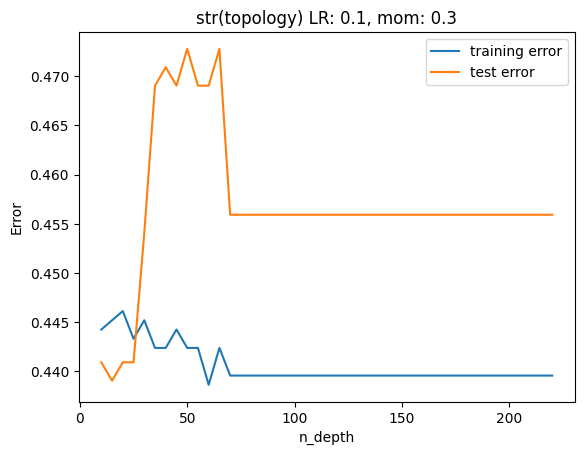

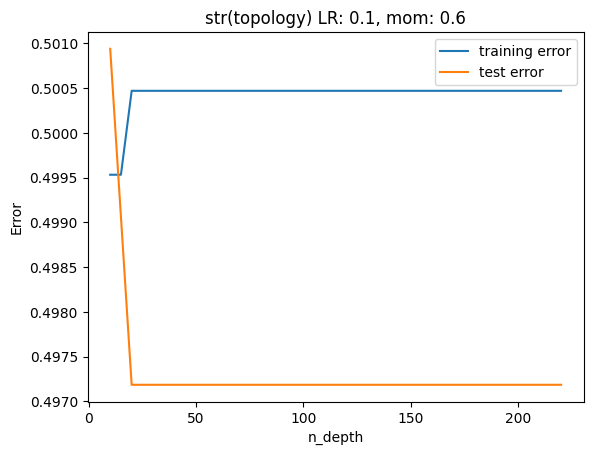

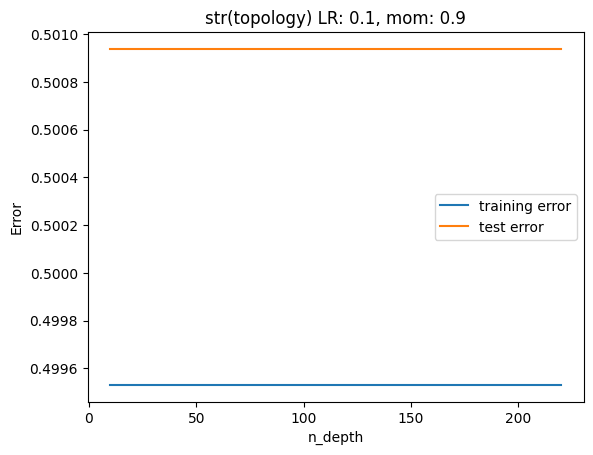

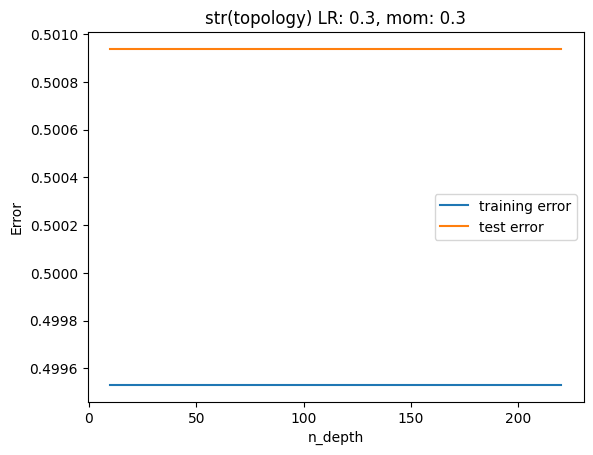

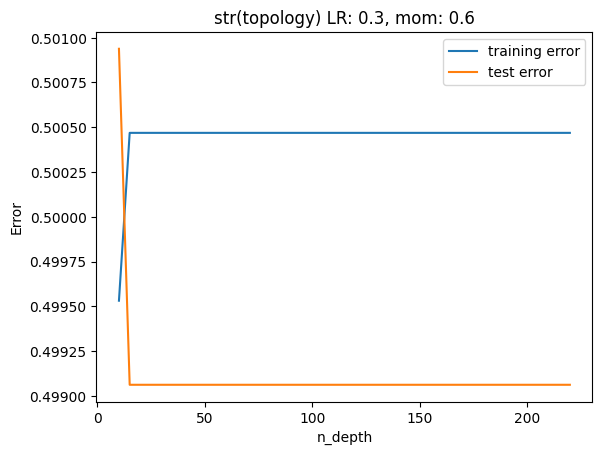

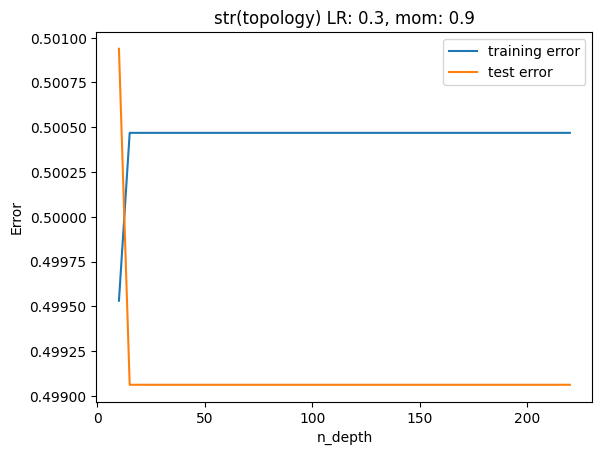

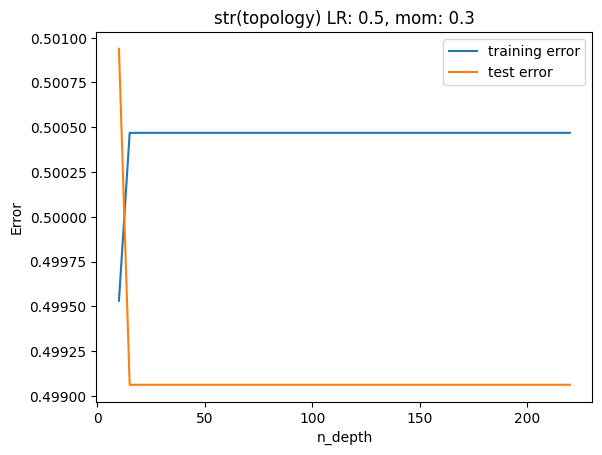

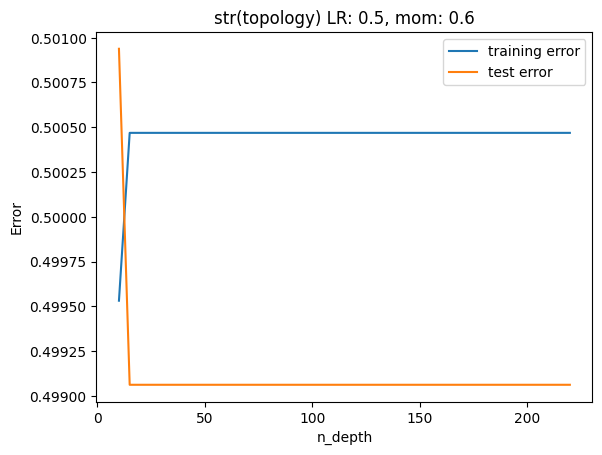

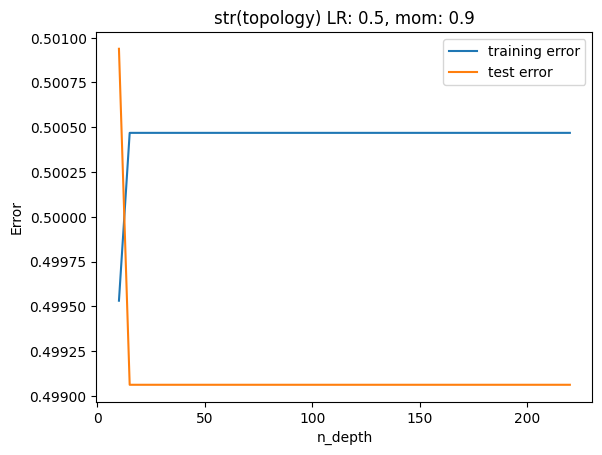

In [11]:
last_expermient_no = 0 # Número del último experimento conducido

# se probaron estas topologías inicialmente: [[8], [8,8,8], [8, 8, 8, 8]]
# Epochs ideal 185
epochs = range(10, 225, 5) # añado un pequeño margen para comprobar que si se entra en overfitting

learning_rate_range = range(1,7,2)
momentum_range = range(3,11,3)

for _lr in learning_rate_range:
    lr = _lr / 10.0
    for _momentum in momentum_range:
        best_acc = -1
        momentum = _momentum / 10.0 if _momentum != 0 else 0
        print(f"================LR: {lr} mom={momentum}=======================")
        training_accuracy = []
        test_accuracy = []
        training_error = []
        test_error = []
        for epoch in epochs:
            clasificador = MLPClassifier(solver='sgd', 
                        hidden_layer_sizes=[8,8,8],
                        max_iter = epoch,
                        random_state=98041,
                        learning_rate_init=lr,
                        momentum=momentum
                        )
            #A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
            train_attribute_values = training_set_2[attributes]
            train_class_values = training_set_2[class_attribute]
            test_attribute_values = test_set_2[attributes]
            test_class_values = test_set_2[class_attribute]
            ################## Modelo ###########################
            model = clasificador.fit(train_attribute_values, train_class_values)
            ################## Clasificar  #################
            predict = model.predict(test_attribute_values)
            ############ Evaluar ###############################
            report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
            report = classification_report(test_class_values, predict, labels=class_attribute_name)
            training_accuracy.append(clasificador.score(train_attribute_values, train_class_values))
            if training_accuracy[-1] > best_acc:
                print(f"New best acc: {training_accuracy[-1]} with {epoch} epochs")
                best_acc = training_accuracy[-1]

            training_error.append(1.0 - clasificador.score(train_attribute_values, train_class_values))
            test_accuracy.append(clasificador.score(test_attribute_values, test_class_values))
            test_error.append(1.0 - clasificador.score(test_attribute_values, test_class_values))
            # print(f"acc={report_dict['accuracy']}")
        plt.figure()
        title = f"str(topology) LR: {lr}, mom: {momentum}"
        plt.title(title)
        plt.plot(epochs, training_error, label="training error")
        plt.plot(epochs, test_error, label="test error")
        plt.ylabel("Error")
        plt.xlabel("n_depth")
        plt.legend()

## Parámetros escogidos

Después de experimentar, los parámetros que me dieron mejores resultados fueron:

- solver = 'lbfgs'
- topología = [8, 8, 8]
- épocas = 85
- learning rate = N/A
- momentum = N/A


In [15]:
clasificador = MLPClassifier(solver='lbfgs', 
                    hidden_layer_sizes=[8,8,8],
                    max_iter = 85,
                    random_state=98041,
)
#A PARTIR DE AQUÍ DE INICIA CON LA SEPARACIÓN Y CLASIFICACIÓN
train_attribute_values = training_set_2[attributes]
train_class_values = training_set_2[class_attribute]
test_attribute_values = test_set_2[attributes]
test_class_values = test_set_2[class_attribute]
################## Modelo ###########################
model = clasificador.fit(train_attribute_values, train_class_values)
################## Clasificar  #################
predict = model.predict(test_attribute_values)
############ Evaluar ###############################
report_dict = classification_report(test_class_values, predict, labels=class_attribute_name, output_dict=True)
acc = report_dict["accuracy"]
report = classification_report(test_class_values, predict, labels=class_attribute_name)

print(f"accuracy exacto: {acc}")
print(report)

accuracy exacto: 0.7467166979362101
                 precision    recall  f1-score   support

tested_negative       0.76      0.72      0.74       267
tested_positive       0.73      0.77      0.75       266

       accuracy                           0.75       533
      macro avg       0.75      0.75      0.75       533
   weighted avg       0.75      0.75      0.75       533

